## We are looking to see if the mean prison population has increased over time, from 2012 to 2016.


Ho: The mean prison population has remained the same or has decreased year over year between 2012 and 2015

Ha: The mean prison population has increased year over year between 2012 and 2015

alpha = 0.05

In [72]:
# Import Pandas Library
import pandas as pd

# Import Seaborn
import seaborn as sns
sns.set_style('whitegrid')

# Import Stats
from scipy import stats

# Import Math
import math

# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Import Numpy
import numpy as np

In [73]:
# Load in and preview first dataset, 'prison_custody_by_state.csv'
# This data includes year-end prison custody totals by state as reported by the Bureau of 
# Justice Statistics' National Prisoner Statistics Program. Federal row reflects Bureau of Prison custody totals.

df1 = pd.read_csv('prison_custody_by_state.csv')
df1.head()

,jurisdiction,includes_jails,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Federal,0,"149,852","158,216","168,144","177,600","186,364","190,844","197,285","198,414","205,087","206,968","214,774","216,915","214,989","209,561","195,622","188,311"
1,Alabama,0,"24,741","25,100","27,614","25,635","24,315","24,103","25,253","25,363","27,241","27,345","26,813","26,768","26,825","26,145","25,212","23,745"
2,Alaska,1,"4,570","4,351","4,472","4,534","4,798","5,052","5,151","4,997","5,472","5,369","6,216","6,308","5,081","6,323","5,247","4,378"
3,Arizona,0,"27,710","29,359","31,084","32,384","33,345","35,752","37,700","39,455","40,544","40,130","39,949","40,013","41,031","42,136","42,204","42,248"
4,Arkansas,0,"11,489","11,849","12,068","12,577","12,455","12,854","13,275","13,135","13,338","14,192","14,090","14,043","14,295","15,250","15,784","15,833"


In [74]:
# Check out datatypes

df1.dtypes

jurisdiction      object
includes_jails     int64
2001              object
2002              object
2003              object
2004              object
2005              object
2006              object
2007              object
2008              object
2009              object
2010              object
2011              object
2012              object
2013              object
2014              object
2015              object
2016              object
dtype: object

In [75]:
# Remove commas from data and convert strings into integers

cols_to_remove_commas = df1.columns[2:]
df1[cols_to_remove_commas] = df1[cols_to_remove_commas].replace({',':''}, regex=True).astype(int)
df1.head()

,jurisdiction,includes_jails,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Federal,0,149852,158216,168144,177600,186364,190844,197285,198414,205087,206968,214774,216915,214989,209561,195622,188311
1,Alabama,0,24741,25100,27614,25635,24315,24103,25253,25363,27241,27345,26813,26768,26825,26145,25212,23745
2,Alaska,1,4570,4351,4472,4534,4798,5052,5151,4997,5472,5369,6216,6308,5081,6323,5247,4378
3,Arizona,0,27710,29359,31084,32384,33345,35752,37700,39455,40544,40130,39949,40013,41031,42136,42204,42248
4,Arkansas,0,11489,11849,12068,12577,12455,12854,13275,13135,13338,14192,14090,14043,14295,15250,15784,15833


In [76]:
type(df1['2001'][3])

numpy.int64

In [77]:
df1.mean()

includes_jails        0.117647
2001              26074.627451
2002              26811.000000
2003              27335.588235
2004              27878.745098
2005              28381.078431
2006              29183.921569
2007              29674.313725
2008              29861.823529
2009              29895.098039
2010              29831.627451
2011              29509.529412
2012              29096.333333
2013              29122.862745
2014              29005.882353
2015              28249.450980
2016              27784.647059
dtype: float64

In [78]:
list_2012 = df1["2012"].values
list_2013 = df1["2013"].values
list_2014 = df1["2014"].values
list_2015 = df1["2015"].values
list_2016 = df1["2016"].values

In [79]:
list_2012

array([216915,  26768,   6308,  40013,  14043, 132935,  20328,  17164,
         6730,  99835,  55178,   5297,   7715,  49348,  28034,   8735,
         9505,  12998,  18601,   1977,  21810,  11127,  43594,   9421,
        15791,  31205,   3095,   4721,  12594,   2568,  23050,   6640,
        54058,  37378,   1413,  50872,  24370,  14123,  50228,   3042,
        21867,   3596,  19817, 155195,   5309,   2034,  29708,  16919,
         5335,  22419,   2187])

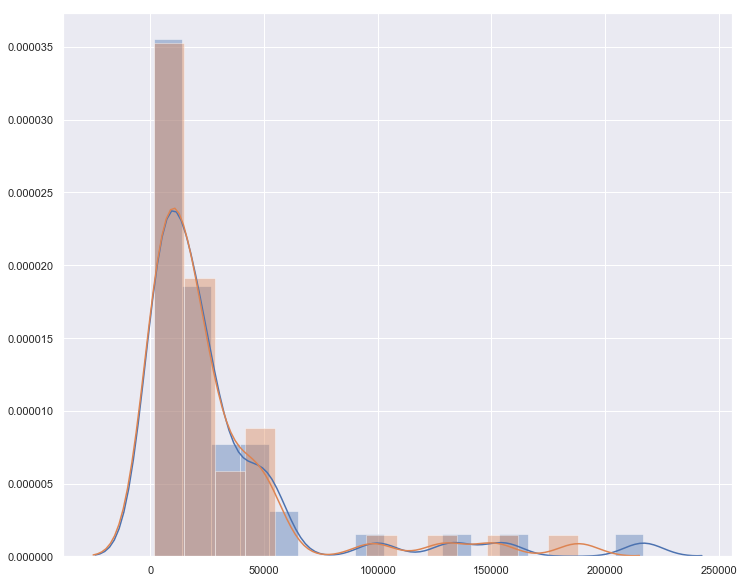

In [80]:
# Draw a plot showing overlapping of distribution means and sds for incpection

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(list_2012) # Blue distribution
#sns.distplot(list_2013) # Orange distribution
#sns.distplot(list_2014) # Green distribution
#sns.distplot(list_2015) # Red distribution
sns.distplot(list_2016) # Orange distribution (with only 2012) # Purple distribution (with all)

## Looking at the distributions from 2012 and 2016, they look vey similar.

In [81]:
print('The mean prison population in the U.S. in 2012 was: {}. The standard deviation of the prison population in the U.S. in 2012 was: {}.'.format(list_2012.mean(),list_2012.std()))


The mean prison population in the U.S. in 2012 was: 29096.333333333332. The standard deviation of the prison population in the U.S. in 2012 was: 40435.444287070844.


In [82]:
print('The mean prison population in the U.S. in 2016 was: {}. The standard deviation of the prison population in the U.S. in 2016 was: {}.'.format(list_2016.mean(),list_2016.std()))


The mean prison population in the U.S. in 2016 was: 27784.647058823528. The standard deviation of the prison population in the U.S. in 2016 was: 37389.99103032764.


In [83]:
def visualize_t(t_stat, n1, n2):

    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca()

    # generate points on the x axis between -4 and 4:
    xs = np.linspace(-4, 4, 500)
 
    # use stats.t.pdf to get values on the probability density function for the t-distribution
    ys= stats.t.pdf(xs, n1+n2-2, 0, 1)
    
    # Draw two sided boundary for critical-t
    ax.plot(xs, ys, linewidth=4, color='blue')
    
    ax.axvline(t_stat, color = 'red', linestyle='--', lw=5)
    ax.axvline(-t_stat, color = 'red', linestyle='--', lw=5)
    
    plt.show()

In [84]:
# Two sample T-Test

stats.ttest_ind(list_2012, list_2016) #order ok?
#If t-stat is > 0, doesn't that mean list_2016 mean > than mean list_2012 because above we see that is not true

Ttest_indResult(statistic=0.1684132093067025, pvalue=0.8665983767438428)

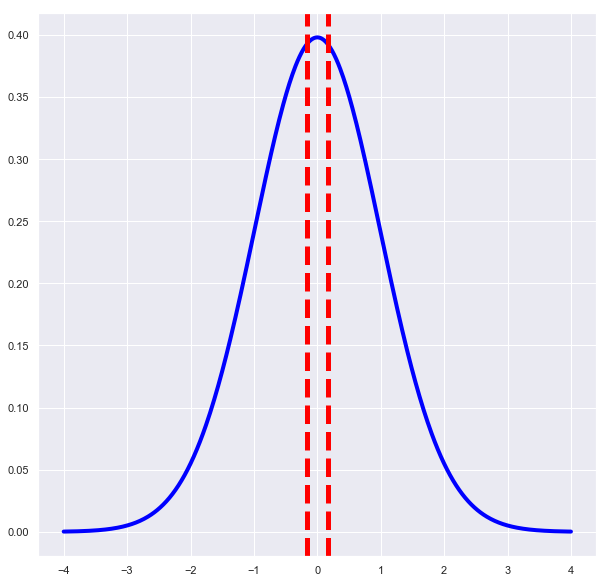

In [85]:
# Visulize t and p-value

n1 = 51
n2 = 51
t_stat = 0.1684132093067025
visualize_t(t_stat, n1, n2)

In [46]:
# Paired T-Test

stats.ttest_rel(list_2012, list_2016) 

Ttest_relResult(statistic=2.1946365203688156, pvalue=0.032862108959372936)

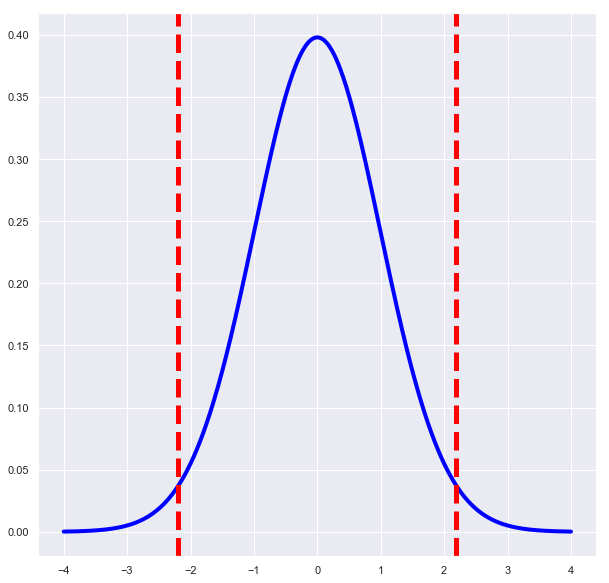

In [87]:
#Visulize t and p-value

n1 = 51
n2 = 51
t_stat = 2.1946365203688156
visualize_t(t_stat, n1, n2)

In [54]:
# How do I test all samples instead of just two years? Do I just do 2012 and 2016?
# Two sample t test or paired t test?
# Can we assume equal variance
# t test or z?
# Since t is less than 0 is p-value 1-p/2?
# Check for type 1/2 errors with plot http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html


In [ ]:
#1) Set up null and alternative hypotheses
#2) Choose a significance level
#3) Calculate the test statistic
#4) Determine the critical or p-value (find the rejection region)
#5) Compare t-value with critical t-value to reject or fail to reject the null hypothesis